In [1]:
import os
import GPX_functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
myproj = ccrs.PlateCarree()
# plt.style.use("dark_background")
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
import matplotlib.font_manager as fm
fe = fm.FontEntry(fname="/home/ctroupin/.fonts/D-DIN.ttf", name='D-DIN')
fm.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'

In [2]:
figdir = "../images/4cimes"

In [18]:
def add_legend(colordict, ax, loc=2, ncol=2, legtitle=None):
    """Add a legend on the current ax using the color dictionary,
    which related a text and a color.
    
    ## Example
    
    colordict = {"< 1%": "#ffffe5",
             "1-5%": "#f7fcb9",
             "5-10%": "#d9f0a3",
             "10-15%": "#addd8e",
             "15-20%": "#78c679",
             "20-30%": "#41ab5d",
             "30-40%": "#238443",
             "> 40%": "#005a32"
            }
    """
    for k, v in colordict.items():
        ax.plot(0., 0., "s", color=v, markersize=7, label=k)
    leg = plt.legend(loc=loc, fontsize=12, edgecolor=None, ncol=ncol)
    leg.get_frame().set_linewidth(0.0)
    if legtitle is not None:
        leg.set_title(legtitle, prop={'size': 14})

In [22]:
cmap = mpl.cm.get_cmap('RdYlGn_r')
norm = mpl.colors.Normalize(vmin=140.0, vmax=170.0)
colordict = {"< 100": cmap(norm(99)),
             "100-110": cmap(norm(105)),
             "110-120": cmap(norm(115)),
             "120-130": cmap(norm(125)),
             "130-140": cmap(norm(135)),
             "140-150": cmap(norm(145)),
             "150-160": cmap(norm(155))
            }

colordict = {"< 140": cmap(norm(139)),
             "140-145": cmap(norm(142.5)),
             "145-150": cmap(norm(147.5)),
             "150-155": cmap(norm(152.5)),
             "155-160": cmap(norm(157.5)),
             "160-165": cmap(norm(162.5)),
             "165-170": cmap(norm(167.5))
            }

/tmp/ipykernel_17438/278045639.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('RdYlGn_r')


## Read the data from the fit file

In [15]:
datafile1 = '/home/ctroupin/data/GPX/FIT/2023-11-12-11-04-28.fit'
datafile2 = "/home/ctroupin/data/GPX/FIT/2024-11-10-11-02-05.fit"

lon, lat, ele, times, T, HR = GPX_functions.read_data_fit(datafile1)
lon2, lat2, ele2, times2, T2, HR2 = GPX_functions.read_data_fit(datafile2)

sarttilman = [5.5721, 5.57416, 50.577, 50.57852]
lapalma = [-18.0725, -17.6983, 28.4385, 28.8591]
verviers = (5.82, 5.95, 50.54, 50.63)
#battice = 
domain = verviers

In [16]:
cmap = plt.cm.hot_r
hrmin = 120
hrmax = 180
norm = mpl.colors.BoundaryNorm(np.arange(hrmin, hrmax + 0.00001, 5), cmap.N)

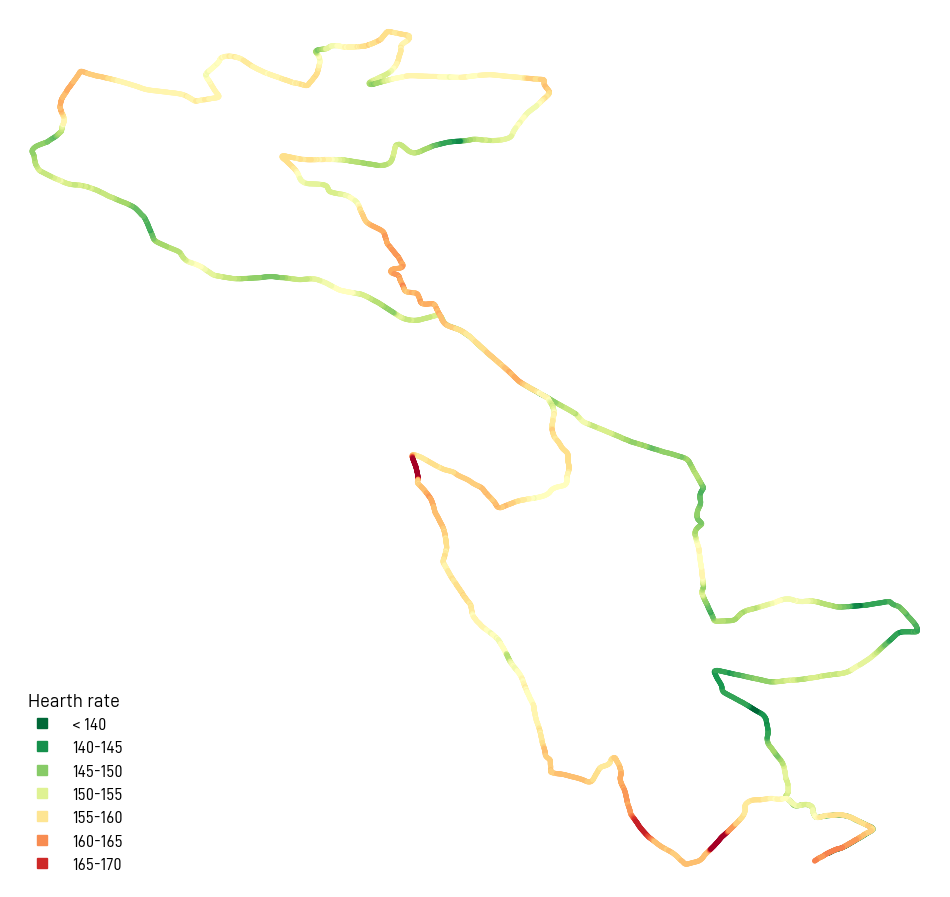

In [24]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111, projection=myproj, frameon=False)
scat = ax.scatter(lon2, lat2, s=7, c=HR2[1:], cmap=plt.cm.RdYlGn_r, vmin=145, vmax=175)
"""
for i in range(0, len(lon)-1):
    if HR[i] > hrmin:
        ax.arrow(lon[i], lat[i], lon[i+1]-lon[i], lat[i+1]-lat[i], color=cmap(norm(HR[i])),
                          alpha=0.5, width=0.000001, head_width=0.00001, zorder=4)
"""
ax.set_extent((lon.min()-0.002, lon.max()+0.002, lat.min()-0.002, lat.max()+0.002))
plt.savefig(os.path.join(figdir, "cardio4cimes2024_white01.jpg"), dpi=300, bbox_inches="tight")

add_legend(colordict, ax, loc=3, ncol=1, legtitle="Hearth rate")

plt.savefig(os.path.join(figdir, "cardio4cimes2024_white03.jpg"), dpi=300, bbox_inches="tight")
plt.show()

## Scatter plot

In [25]:
time_seconds = np.array([(ttt - times[0]).seconds for ttt in times])
time_seconds2 = np.array([(ttt - times[0]).seconds for ttt in times2])

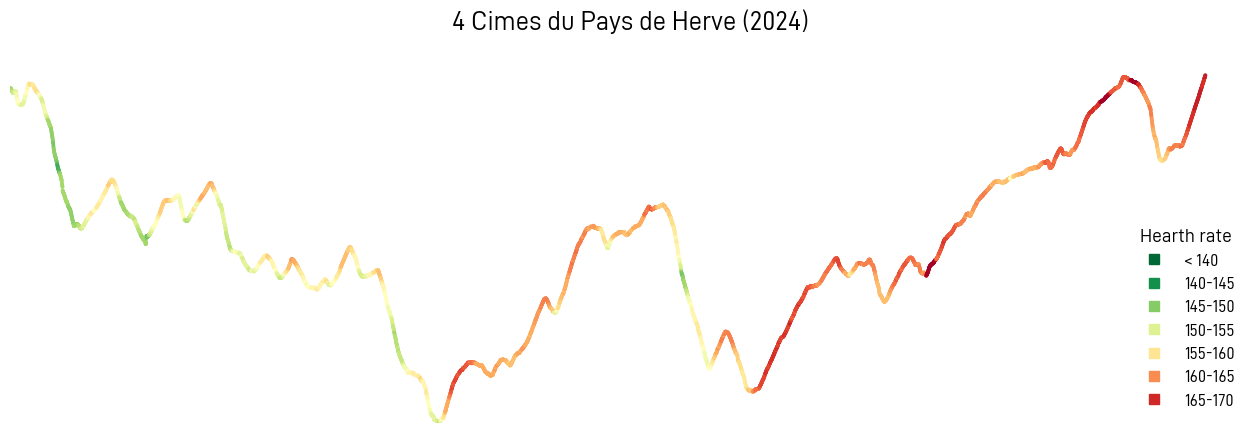

In [28]:
fig = plt.figure(figsize=(16, 5))
ax = plt.subplot(111)
ax.scatter(time_seconds2 / 3600., ele2, c=HR2, s=3, cmap=cmap, norm=norm)
ax.set_xlim(0, 2.5)
ax.set_ylim(75, 321.)
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.left'] = False
plt.axis('off')
add_legend(colordict, ax, loc=4, ncol=1, legtitle="Hearth rate")
ax.set_title("4 Cimes du Pays de Herve (2024)")
#ax.set_ylabel("Altitude\n(m)", rotation=0, ha="right")
#ax.set_xlabel("Time (hours)")
plt.savefig("../images/cardio_alti_4cimes2024_simple_white.jpg")